### Instantiate the model

In [15]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# preprocessing, since horsepowerr is a composed of strings and has '?' values that need to be converted
auto_df = pd.read_csv('datasets/auto-mpg.csv')
auto_df['horsepower'] = auto_df['horsepower']
X = auto_df.drop(auto_df[["car name","mpg"]], axis="columns").values
X = np.where(X == '?', 0,X).astype(int)

y = auto_df["mpg"].values

SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.26,
                           random_state=SEED)

In [16]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10,
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

### Evaluate the training error

In [17]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

In [18]:
X_base = X[1]
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
dt_base = DecisionTreeRegressor(max_depth=4,
                                     min_samples_leaf=0.26,
                                     random_state=SEED)
dt_base.fit(X_base_train, y_base_train)

y_base_pred = dt_base.predict(X_base_train)

RMSE_base = (MSE(y_base_train, y_base_pred))**(1/2)

print('Base RMSE: {:.2f}'.format(RMSE_base))

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Base RMSE: 4.65
CV RMSE: 4.80
Train RMSE: 4.65


### Ensemble training

In [19]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
import pandas as pd

# Read 'indian_liver_patient_preprocessed.csv'
indian_liver = pd.read_csv('datasets/indian_liver_patient_preprocessed.csv')

# Create arrays for features and target variable
X = indian_liver.drop('Liver_disease', axis=1).values
y = indian_liver['Liver_disease'].values

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state= SEED)

In [20]:
# Instantiate lr
lr = LogisticRegression(random_state=SEED, max_iter=1000)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [21]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy score of clf on the test set
    accuracy = accuracy_score(y_test, y_pred)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.747
K Nearest Neighbours : 0.724
Classification Tree : 0.730


In [24]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
accuracy_vc = accuracy_score(y_test, y_pred)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_vc))

Voting Classifier: 0.759


### Bagging

In [27]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)

# Instantiate bc
bc = BaggingClassifier(estimator=dt,
                       n_estimators=50,
                       random_state=SEED)

In [28]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)

# Print acc_test
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.69


In [ ]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict the test set labels
y_pred = bc.predict(X_test)

In [31]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(estimator=dt,
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)

In [34]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}'.format(acc_test))
print('OOB accuracy: {:.3f}'.format(acc_oob))

Test set accuracy: 0.695
OOB accuracy: 0.677


### Random Forest

Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington,
D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose,
you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [40]:
%%time
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/bikes.csv')

# Create arrays for features and target variable
X = df.drop('cnt', axis=1)
y = df['cnt']

# Set seed for reproducibility
SEED = 2

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= SEED)

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

CPU times: total: 141 ms
Wall time: 143 ms


RandomForestRegressor(n_estimators=25, random_state=2)

In [41]:
%%time
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49
CPU times: total: 0 ns
Wall time: 7 ms


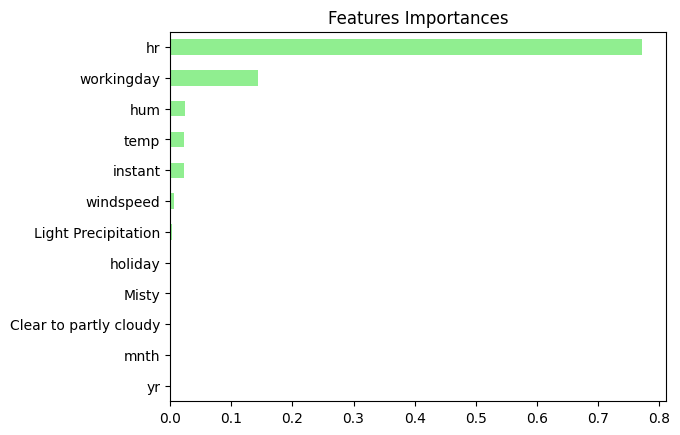

In [42]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()